In [2]:
import argparse
import matplotlib 
matplotlib.use('Agg')
import math
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import re

%matplotlib inline


linestyles = ["solid", "dashed", "dotted"]
colors=["red", "blue", "green", "purple"]


In [3]:
input_dir = "results/incremental"
boosted = os.path.join(input_dir, "boosted.tsv")
dpf = os.path.join(input_dir, "dpf.tsv")
matrix = os.path.join(input_dir, "matrix.tsv")

all_files = [boosted, dpf, matrix]

col_num_rows = 0
col_update_size = 1
col_off_server = 2
col_off_client = 3
col_off_comm = 4
col_client_storage = 5
col_on_server = 6
col_on_client = 7
col_on_comm = 8

In [4]:
boosted_data = np.genfromtxt(boosted, comments='#', skip_header=2)
dpf_data = np.genfromtxt(dpf, comments='#', skip_header=2)
matrix_data = np.genfromtxt(matrix, comments='#', skip_header=2)

num_queries = np.array([1,2,4,8,16,32,64,128,512])

per_query_time = []
per_change_comm = []
# Compute cumulative costs
for i, data in enumerate([boosted_data, dpf_data, matrix_data]):
    online_time = np.outer(data[:, col_on_server], num_queries)
    online_comm = np.outer(data[:, col_on_comm], num_queries)
    total_time = np.transpose([data[:,col_off_server]]*len(num_queries)) + online_time
    total_comm = np.transpose([data[:,col_off_comm]]*len(num_queries)) + online_comm
    per_query_time += [total_time / num_queries]
    per_change_comm += [ total_comm / np.transpose(([data[:, col_update_size]]*len(num_queries))) ]
    

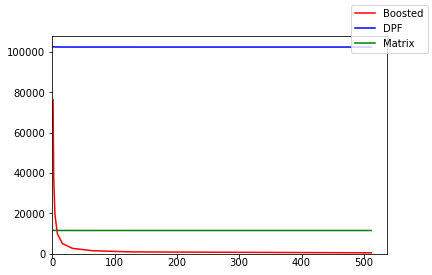

In [5]:
# Server running time

fig, ax = plt.subplots()

ax.set_xscale('linear')
ax.set_yscale('linear')

ax.tick_params('x', pad=0.5)

labels = ['Boosted', 'DPF', 'Matrix']
for idx, data in enumerate([boosted_data, dpf_data, matrix_data]):
    plt.plot(num_queries,per_query_time[idx][0,:],
            color=colors[idx],
            label=labels[idx])

plt.xlim(xmin=0.0)
plt.ylim(ymin=0.0)

fig.legend()
plt.show()
#plt.savefig(args.out_basename+"_server.pdf")

In [50]:
print(col_on_server)
boosted_data[:,col_update_size]

6


array([32000., 16000.,  8000.,  4000.,  2000.,  1000.,   500.])

In [59]:
[boosted_data[:, col_update_size]]*7

[array([32000., 16000.,  8000.,  4000.,  2000.,  1000.,   500.]),
 array([32000., 16000.,  8000.,  4000.,  2000.,  1000.,   500.]),
 array([32000., 16000.,  8000.,  4000.,  2000.,  1000.,   500.]),
 array([32000., 16000.,  8000.,  4000.,  2000.,  1000.,   500.]),
 array([32000., 16000.,  8000.,  4000.,  2000.,  1000.,   500.]),
 array([32000., 16000.,  8000.,  4000.,  2000.,  1000.,   500.]),
 array([32000., 16000.,  8000.,  4000.,  2000.,  1000.,   500.])]